In [6]:
from hw2 import getDistribution
import gensim.downloader as g1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

RECALC_ALL = True

model = g1.load("glove-wiki-gigaword-100")

In [2]:
def get_dists(arr,maxItems=10000):
    arrs = []

    for v in arr:
        arrs.append(getDistribution(model,nthWord=v,maxItems=maxItems))
    return arrs

In [3]:
if RECALC_ALL:
    d_1,d_5,d_10,d_20 = get_dists([1,5,10,20])

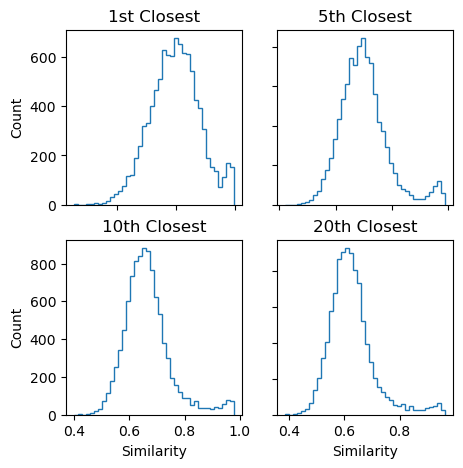

In [10]:
if RECALC_ALL:
    counts_1, bins_1 = np.histogram(d_1,bins=40)
    counts_5, bins_5 = np.histogram(d_5,bins=40)
    counts_10, bins_10 = np.histogram(d_10,bins=40)
    counts_20, bins_20 = np.histogram(d_20,bins=40)
    # plt.stairs(counts, bins)

    fig, axs = plt.subplots(2, 2,figsize=(5,5))
    axs[0, 0].stairs(counts_1, bins_1)
    axs[0, 0].set_title('1st Closest')

    axs[0, 1].stairs(counts_5, bins_5)
    axs[0, 1].set_title('5th Closest')

    axs[1, 0].stairs(counts_10, bins_10)
    axs[1, 0].set_title('10th Closest')

    axs[1, 1].stairs(counts_20, bins_20)
    axs[1, 1].set_title('20th Closest')

    for ax in axs.flat:
        ax.set(xlabel='Similarity', ylabel='Count')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

    plt.savefig('./distros.png')

In [18]:
if RECALC_ALL:
    vals = {
        '1_away':np.mean(d_1),
        '5_away':np.mean(d_5),
        '10_away':np.mean(d_10),
        '20_away':np.mean(d_20),
    }
    tmp = pd.DataFrame(vals,index=[0])
    print(tmp.head())

     1_away    5_away   10_away   20_away
0  0.795239  0.701151  0.664224  0.626673


## Analysis of Distribution


<img src="images/distros.png" alt="Drawing" style="width: 500px;"/>

As we can see from this image, the distribution appears to be a normal distribution centered around different means depending on n where n is the locality to the original word (ie. 1st closest vs 20th closest). The mean that this normal distribution is inversely related to n, meaning that as we ask for words further and further from the original word, the mean of the similarity goes down accordingly.

We can also take a look at how the relationship between the mean value of these distributions compares as we increase n. <br>
<img src="images/table.png" alt='Table' style="width:300px"> <br>
As we can see in the above table, as we increase n, the mean value decreases. It is not a linear decrease as we can look at from 1-10 and 1-20. If these were linearly related, then the decrease from 1-20 would be about double what the decrease from 1-10 would be. However, 0.131 (the decrease from 1-10) is not half of 0.168 (the decrease due to going from 1-20). It also is intuitive that this would not be a linear decrease as the similarity of words in the English language is too complex to follow a simple linear distribution. <br>

Another interesting aspect of these distributions is how there tends to be a peak around the 0.99 similarity in each of the graphs. It does decrease as we increase n, but it is interesting to note that there exists a normal distribution with a large peak close to 0.9. This is most likely due to the nature of the English language having certain words with a large number of synonyms such that even the 20th closest word is still very close to what the original word was. Take a look at the word __big__ for example. There are many more synonyms for the word __big__, like __large__, __massive__, __huge__ to name a few, compared to a word like __computer__ that has fewer synonyms which would cause the similarity values to drop sharper for __computer__ compared to __big__. <br>

Lastly, I would argue that based on the word embedding, if a word's similarity value is greater than 0.6, these words are considered at least similar. I believe this to be the case because, at around n=20, we see the right-hand side spike decreasing to approximate a true normal distribution better. This would signify that at around n=20, words tend to be far enough away from each other that the synonyms stop appearing. Since the mean of the n=20 is around 0.6, I believe that if a word has a similarity rating to another word of above 0.6, then these words are at least similar, __NOTE:__ This does not mean that the words are synonyms, only that there is some similarity between them in the English language (for example, __car__ would be similar to __vehicle__ even tho they are not technically the same thing).

numpy.ndarray